# 多元线性回归实践参考代码

## 梯度下降方法

### 求解简单代价函数的最小值

假设**cost function（代价函数）**：$$ J(\theta) = \theta^2+2\theta $$

则**梯度下降（BGD）公式**： $$ \theta:= \theta- \alpha*(2\theta+2) $$
$$\theta 迭代更新$$

**以下为利用梯度下降方法求解代价函数最小值的代码**

In [447]:
import numpy as np

# 初始化参数为零
maxloop=1000  #最大迭代次数
epsilon=0.00001  #
alpha=0.02    #学习速率
theta =2      #参数初始值
    
count = 0 # 记录迭代次数
converged = False # 是否收敛标志
#cost =  np.inf # 初始化代价为无穷大
costs = [] # 记录每一次迭代的代价值
thetas =[] # 记录每一轮theta的更新 


costs.append(theta**2+2*theta) #记录初始代价函数值
thetas.append(theta)           #记录初始参数值

while count<= maxloop:
        if converged:
            break
        # 迭代次数变化
        count = count + 1
        
        # 梯度下降，迭代更新参数值
        theta= theta-alpha*(2*theta+2)
          
        # 将每次更新的值存在列表中
        thetas.append(theta)
                
        # 更新当前代价函数值，并将每次的结果存在列表中
        cost =theta**2+2*theta
        costs.append(cost)
        
        # 如果收敛，则不再迭代
        if abs(cost)<epsilon:
            converged = True

**求解结果如下：**

In [448]:
theta #参数最优值

-0.9999999999999987

In [449]:
cost #代价函数最小值

-1.0

**梯度下降过程中，代价函数值的变化图**

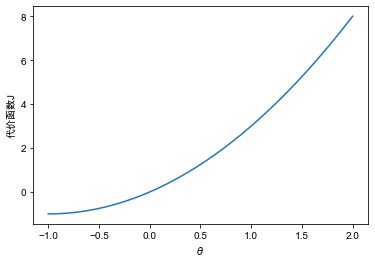

In [450]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

plt.plot(thetas, costs) 
plt.xlabel(r'$\theta$')
plt.ylabel(r'代价函数J')
plt.show()

**梯度下降过程中，$\theta$随迭代次数的变化图**

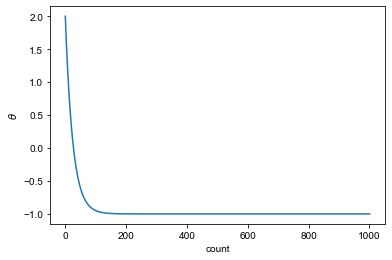

In [451]:
plt.plot(range(len(thetas)),thetas) 
plt.xlabel(r'count')
plt.ylabel(r'$\theta$')
plt.show()

**梯度下降过程中,代价函数J随迭代次数的变化图**

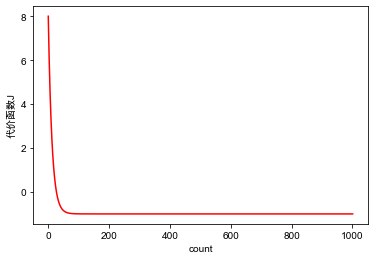

In [452]:
plt.plot(range(len(costs)),costs,color="red") 
plt.xlabel(r'count')
plt.ylabel(r'代价函数J')
plt.show()

### 求解一元线性回归代价函数的最小值

一元线性回归**模型函数**：$$ h_\theta(x) = \theta_0 + \theta_1 x $$
$ h_\theta(x) $ 为模型函数，用来预测<br/>
$ \theta_0 $ 、$ \theta_1 $ 为模型参数<br/>
$ x $ 为实际特征值<br/>
$ \theta_0 + \theta_1 x $ 可以看做是 $ \theta_0\times1 + \theta_1\times x^{(i)} , i = 1,2,...,m $，表示共有 $ m $ 个样本<br/> 
即 
$$
{\begin{bmatrix} 
1 & x^{(1)} \\
1 & x^{(2)} \\
\vdots & \vdots \\
1 & x^{(m)} \\
\end{bmatrix}}\cdot
{\begin{bmatrix} 
\theta_0 \\
\theta_1 \\
\end{bmatrix}} = 
{\begin{bmatrix} 
y^{(1)} \\
y^{(2)} \\
\vdots \\
y^{(m)} \\
\end{bmatrix}}
$$

一元线性回归的**cost function（代价函数）**：$$ J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})^2 $$
而 $ (h_{\theta}(x^{(i)})-y^{(i)})^2 = (h_{\theta}(x^{(i)})-y^{(i)})^T \cdot (h_{\theta}(x^{(i)})-y^{(i)}) $ <br/>
即
$$
{\begin{bmatrix} 
(\hat{y}^{(1)}-y^{(1)}) & (\hat{y}^{(2)}-y^{(2)}) & \cdots & (\hat{y}^{(m)}-y^{(m)}) \\
\end{bmatrix}}
\cdot
{\begin{bmatrix} 
(\hat{y}^{(1)}-y^{(1)}) \\
(\hat{y}^{(2)}-y^{(2)}) \\
\vdots \\
(\hat{y}^{(m)}-y^{(m)}) \\
\end{bmatrix}}
$$

一元线性回归**梯度下降（BGD）公式**： $$ \theta_0 := \theta_0 - \alpha \frac{1}{m} \sum_{i=1}^{m}(h_\theta(x^{(i)})-y^{(i)}) $$
$$ \theta_1 := \theta_1 - \alpha \frac{1}{m} \sum_{i=1}^{m}(h_\theta(x^{(i)})-y^{(i)}) \cdot x^{(i)} $$
**注意同步更新**

**以一组x和y演示python梯度下降实现一元线性回归的代码**

首先导入数据

In [453]:
import pandas as pd
dt=pd.read_excel("/Users/yangwei/Desktop/示例1.xlsx")
dt

,x,y
0,1,5.200
1,2,8.100
2,3,11.050
3,4,14.030
4,5,17.150
5,6,20.040
6,7,23.600
7,8,26.008
8,9,29.100
9,10,32.300


然后构造符合要求的X和Y

In [454]:
X=np.column_stack((np.ones(len(dt.x)),dt.x))
X

array([[ 1.,  1.],
       [ 1.,  2.],
       [ 1.,  3.],
       [ 1.,  4.],
       [ 1.,  5.],
       [ 1.,  6.],
       [ 1.,  7.],
       [ 1.,  8.],
       [ 1.,  9.],
       [ 1., 10.]])

In [455]:
Y=np.array(dt.y).reshape((10,1))
Y

array([[ 5.2  ],
       [ 8.1  ],
       [11.05 ],
       [14.03 ],
       [17.15 ],
       [20.04 ],
       [23.6  ],
       [26.008],
       [29.1  ],
       [32.3  ]])

**以下为利用梯度下降方法实现一元线性回归的代码**

In [456]:
def h(theta, X):
    '''定义模型函数'''
    return np.dot(X, theta)  # 此时的X为处理后的X

In [457]:
def J(theta, X, Y):
    '''定义代价函数'''
    m = len(X)
    return np.sum(np.dot((h(theta,X)-Y).T, (h(theta,X)-Y))/(2 * m))

In [458]:
alpha = 0.01 # 学习率
maxloop = 1500# 最大迭代次数
epsilon = 0.0001 # 收敛判断条件

m, n = X.shape # m为样本数，n为特征数，在这里为2   
    
# 初始化参数为零
theta = np.zeros((2,1))
    
count = 0 # 记录迭代次数
converged = False # 是否收敛标志
cost = np.inf # 初始化代价为无穷大
costs = [] # 记录每一次迭代的代价值

costs.append(J(theta, X, Y)) #记录初始代价函数值
thetas = {0:[theta[0,0]], 1:[theta[1,0]]} # 记录每一轮theta的更新
    
while count<= maxloop:
        if converged:
            break
        # 更新theta
        count = count + 1
        
        # 单独计算
        theta0 = theta[0,0] - alpha / m * (h(theta, X) - Y).sum()
        theta1 = theta[1,0] - alpha / m * (np.dot(X[:,1][:,np.newaxis].T,(h(theta, X) - Y))).sum()   # 重点注意一下    
        # 同步更新
        theta[0,0] = theta0
        theta[1,0] = theta1
        thetas[0].append(theta0)
        thetas[1].append(theta1)
                    
        # 更新当前cost
        cost = J(theta, X, Y)
        costs.append(cost)
        
        # 如果收敛，则不再迭代
        if cost<epsilon:
            converged = True

In [459]:
theta

array([[2.01260073],
       [3.02377073]])

In [460]:
cost

0.014141402297076455

**绘制回归直线,查看回归效果**

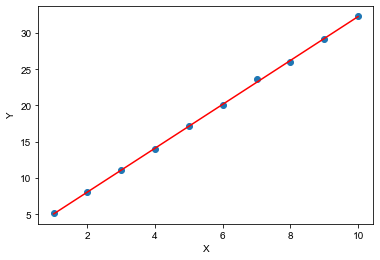

In [461]:
plt.xlabel(u'X')
plt.ylabel(u'Y')
plt.plot(X[:,1], h(theta, X),color='r')
plt.scatter(X[:,1], Y)
plt.show()

**梯度下降过程中,代价函数J随迭代次数的变化图**

In [462]:
print(np.array(costs).max(),np.array(costs).min()) # 找到代价值的最大值、最小值，便于控制y轴范围

211.53967819999997 0.014141402297076455


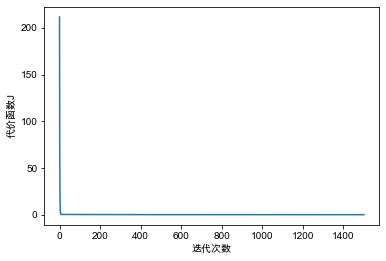

In [463]:
plt.xlabel(u'迭代次数')
plt.ylabel(u'代价函数J')
plt.plot(range(len(costs)),costs)
plt.show()

**绘制梯度下降过程**

In [464]:
print(np.array(thetas[0]).min(), np.array(thetas[0]).max())  #查看theta0的范围

0.0 2.0126007281442355


In [465]:
print(np.array(thetas[1]).min(), np.array(thetas[1]).max())  #查看theta1的范围

0.0 3.2371120969909453


In [466]:
# 准备网格数据，以备画梯度下降过程图
%matplotlib
from mpl_toolkits.mplot3d import axes3d
import matplotlib
size = 100
theta0Vals = np.linspace(0,5, size)
theta1Vals = np.linspace(0,5, size)
JVals = np.zeros((size, size))   # 按照theta0Vals与theta1Vals 将JVals初始化为0
for i in range(size):
    for j in range(size):
        col = np.matrix([[theta0Vals[i]], [theta1Vals[j]]])
        JVals[i,j] = J(col, X, Y)

theta0Vals, theta1Vals = np.meshgrid(theta0Vals, theta1Vals)
JVals = JVals.T

Using matplotlib backend: MacOSX


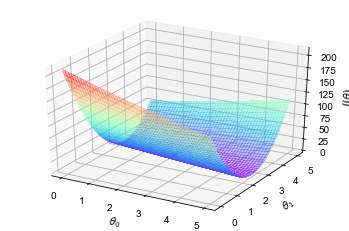

In [467]:
# 绘制3D代价函数图形
contourSurf = plt.figure()
ax = contourSurf.gca(projection='3d')

ax.plot_surface(theta0Vals, theta1Vals, JVals,  rstride=2, cstride=2, alpha=0.3,
                cmap=matplotlib.cm.rainbow, linewidth=0, antialiased=False)
ax.plot(theta[0], theta[1], 'rx')
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_zlabel(r'$J(\theta)$')
plt.show()

![](https://tva1.sinaimg.cn/large/007S8ZIlly1gjl6hifdnaj30i20bxaca.jpg)

**绘制等高线图，查看下降过程**

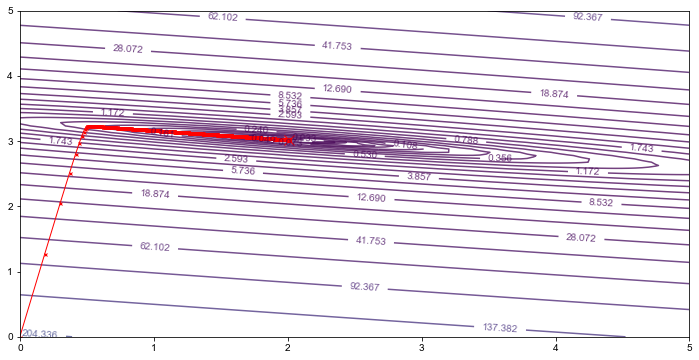

In [468]:
# 绘制代价函数等高线图
%matplotlib inline
plt.figure(figsize=(12,6))
CS = plt.contour(theta0Vals, theta1Vals, JVals, np.logspace(-2,3,30), alpha=.75)
plt.clabel(CS, inline=1, fontsize=10)

# 绘制最优解
plt.plot(theta[0,0], theta[1,0], 'rx', markersize=10, linewidth=3)

# 绘制梯度下降过程
plt.plot(thetas[0], thetas[1], 'rx', markersize=3, linewidth=1) # 每一次theta取值
plt.plot(thetas[0], thetas[1], 'r-',markersize=3, linewidth=1) # 用线连起来

plt.show()

**用sklearn包中的线性回归求解器验证结果**

In [469]:
Y.T

array([[ 5.2  ,  8.1  , 11.05 , 14.03 , 17.15 , 20.04 , 23.6  , 26.008,
        29.1  , 32.3  ]])

In [470]:
from sklearn import linear_model
reg_yz = linear_model.LinearRegression().fit(X,Y)
reg_yz.score(X,Y)

0.9996362818968156

In [471]:
reg_yz.intercept_ #截距项 

array([2.08146667])

In [472]:
reg_yz.coef_

array([[0.        , 3.01387879]])

In [473]:
print("梯度下降求解结果为：截距项为%.2f,系数为%.2f"%(theta[0], theta[1]))
print("线性回归求解器结果为：截距项为%.2f,系数为%.2f"%(reg_yz.intercept_, reg_yz.coef_[0][1]))     

梯度下降求解结果为：截距项为2.01,系数为3.02
线性回归求解器结果为：截距项为2.08,系数为3.01


## 多元线性回归案例

###  导入数据

In [474]:
import os
os.chdir("/Users/yangwei/Desktop/桌面文件夹mac2020.6.5/课程/数据挖掘与机器学习/授课资料/") #修改当前工作目录

import pandas as pd
data=pd.read_excel("data_house.xlsx") #导入房价数据
data.head() #查看数据前5行

,CATE,bedrooms,AREA,floor,subway,school,style,price
0,朝阳,1,46.06,middle,1,0,无厅,4.8850
1,朝阳,1,59.09,middle,1,0,有厅,4.6540
2,海淀,5,278.95,high,1,1,有厅,7.1662
3,海淀,3,207.00,high,1,1,有厅,5.7972
4,丰台,2,53.32,low,1,1,有厅,7.1268


### 查看数据概况，是否有缺失值等

In [475]:
data.info() #打印数据摘要，可以看出样本数，数据类型、是否有缺失值，占用内存情况

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16210 entries, 0 to 16209
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CATE      16210 non-null  object 
 1   bedrooms  16210 non-null  int64  
 2   AREA      16210 non-null  float64
 3   floor     16210 non-null  object 
 4   subway    16210 non-null  int64  
 5   school    16210 non-null  int64  
 6   style     16210 non-null  object 
 7   price     16210 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 1013.2+ KB


In [476]:
data.describe()      # 描述性统计信息，只显示数值型变量

,bedrooms,AREA,subway,school,price
count,16210.000000,16210.000000,16210.000000,16210.000000,16210.000000
mean,2.166194,91.746598,0.827822,0.303085,6.115181
std,0.809907,44.000768,0.377546,0.459606,2.229336
min,1.000000,30.060000,0.000000,0.000000,1.834800
25%,2.000000,60.000000,1.000000,0.000000,4.281225
50%,2.000000,78.830000,1.000000,0.000000,5.747300
75%,3.000000,110.517500,1.000000,1.000000,7.609975
max,5.000000,299.000000,1.000000,1.000000,14.987100


### 描述分析

In [477]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

#jupyter notebook中为了在代码行直接显示图形
%matplotlib inline 

warnings.filterwarnings('ignore')
#plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

#### 单变量分析

In [478]:
#plt.style.use('ggplot') #设置图形显示风格

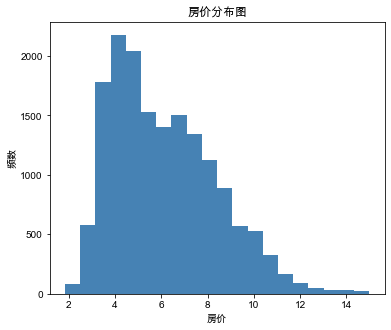

In [479]:
## 标签y的直方图
figure = plt.figure(1, figsize=(6, 5))
plt.hist(data.price,bins=20,color='steelblue')
plt.title('房价分布图')  # 设置标题
plt.ylabel('频数')  # 设置纵坐标
plt.xlabel('房价')  # 设置横坐标
plt.show()


# 使用pandas包绘制直方图
# figure = plt.figure(1, figsize=(6, 5))
# data.price.plot.hist(bins=20,color='steelblue')
# plt.title('房价分布图')  # 设置标题
# plt.ylabel('频数')  # 设置纵坐标
# plt.xlabel('房价')  # 设置横坐标
# plt.show()


# 使用seaborn包绘制直方图
# figure = plt.figure(1, figsize=(6, 5))
# sns.distplot(data.price,bins=20,color='steelblue', kde=False) # kde控制是否显示核密度估计图
# plt.title('房价分布图')  # 设置标题
# plt.ylabel('频数')  # 设置纵坐标
# plt.xlabel('房价')  # 设置横坐标
# plt.show()

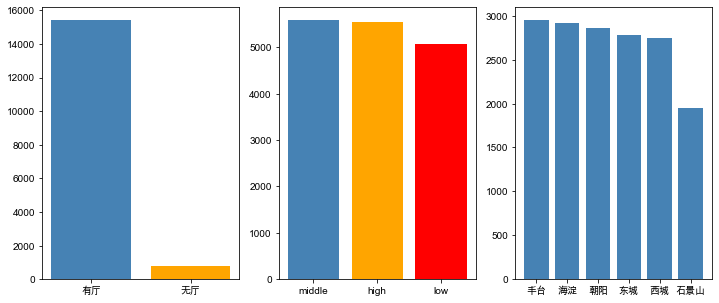

In [480]:
##分类特征的数量统计柱形图
fig = plt.figure(2, figsize=(12, 5))
ax1 = plt.subplot(131) 
ax1.bar(data['style'].value_counts().index,data['style'].value_counts().values,color = ['steelblue','orange'])


ax2 = plt.subplot(132) 
ax2.bar(data['floor'].value_counts().index,data['floor'].value_counts().values,color = ['steelblue','orange','red'])

ax3 = plt.subplot(133) 
ax3.bar(data['CATE'].value_counts().index,data['CATE'].value_counts().values,color = 'steelblue')
plt.show()


# 或者使用pandas包绘制条形图
# plt.figure(2, figsize=(12, 5))
# plt.subplot(131) 
# data.groupby('style').size().plot(kind='bar',color = ['steelblue','orange'])

# plt.subplot(132) 
# data.groupby('floor').size().plot(kind='bar',color = ['steelblue','orange','red'])

# plt.subplot(133) 
# data.groupby('CATE').size().plot(kind='bar',color = 'steelblue')
# plt.show()


# 或者使用seaborn包绘制条形图
# plt.figure(2, figsize=(12, 5))
# plt.subplot(131)
# sns.countplot(x='style',data=data)

# plt.subplot(132)
# sns.countplot(x='floor',data=data)

# plt.subplot(133)
# sns.countplot(x='CATE',data=data)
# plt.show()


#### 双变量分析

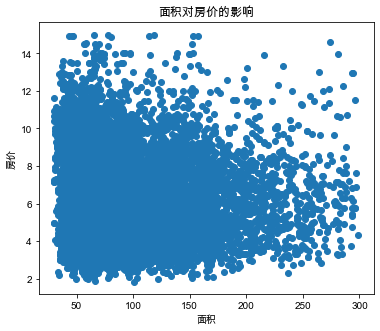

In [481]:
##绘制绘制定量特征与标签y的散点图
fig = plt.figure(3, figsize=(6, 5))
plt.scatter(data['AREA'],data['price'])
plt.title('面积对房价的影响')  # 设置标题
plt.ylabel('房价')  # 设置纵坐标
plt.xlabel('面积')  # 设置横坐标
plt.show()

# 或者使用pandas包绘制散点图
# fig = plt.figure(3, figsize=(6, 5))
# data.plot(kind="scatter",x="AREA",y="price")
# plt.title('面积对房价的影响')  # 设置标题
# plt.ylabel('房价')  # 设置纵坐标
# plt.xlabel('面积')  # 设置横坐标
# plt.show()

# 或者使用seaborn包绘制散点图
# fig = plt.figure(3, figsize=(6, 5))
# sns.scatterplot(data['AREA'],data['price'])
# plt.title('面积对房价的影响')  # 设置标题
# plt.ylabel('房价')  # 设置纵坐标
# plt.xlabel('面积')  # 设置横坐标
# plt.show()

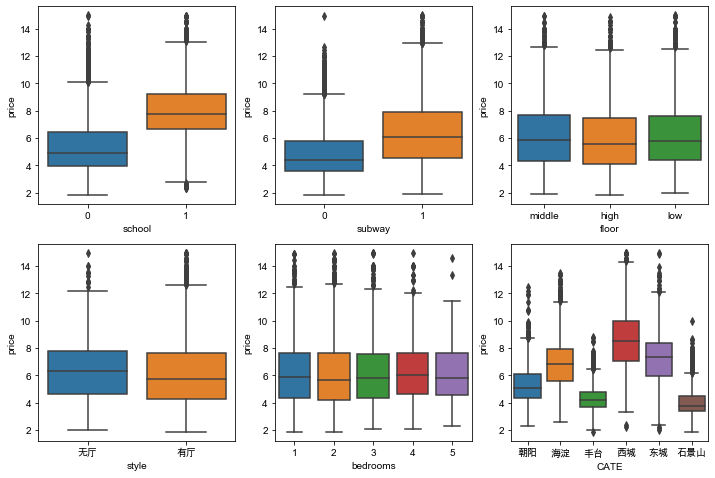

In [482]:
##绘制分类特征与标签y的箱线图

# ## matplotlib绘制箱线图比较麻烦
# figure = plt.figure(4, figsize=(12, 8)) #设置画布
# ### 是否为学区房与房价的箱图
# ax4 = plt.subplot(231)  # 1*3分布的画图中的第一个子图
# ax4.boxplot(data.loc[data['school']==1,'price'], sym='', positions=[0], widths=[0.5], labels=['学区房'])
# ax4.boxplot(data.loc[data['school']==0,'price'], sym='', positions=[1], widths=[0.5], labels=['非学区房'])
# ax4.set_title('学区房对房价的影响')  # 设置标题
# ax4.set_ylabel('房价')  # 设置纵坐标
# ax4.set_xlabel('是否为学区房')  # 设置横坐标


# ### 是否靠近地铁与房价的箱图
# ax5 = plt.subplot(232)  # 1*3分布的画图中的第一个子图
# ax5.boxplot(data.loc[data['subway']==1,'price'], sym='', positions=[0], widths=[0.5], labels=['靠近地铁'])
# ax5.boxplot(data.loc[data['subway']==0,'price'], sym='', positions=[1], widths=[0.5], labels=['不靠近地铁'])
# ax5.set_title('地铁对房价的影响')  # 设置标题
# ax5.set_ylabel('房价')  # 设置纵坐标
# ax5.set_xlabel('是否靠近地铁')  # 设置横坐标

# ### 楼层与房价的箱图
# ax6 = plt.subplot(233)  # 1*3分布的画图中的第一个子图
# ax6.boxplot(data.loc[data['floor']=="high",'price'], sym='', positions=[0], widths=[0.5], labels=['高层'])
# ax6.boxplot(data.loc[data['floor']=="middle",'price'], sym='', positions=[1], widths=[0.5], labels=['中层'])
# ax6.boxplot(data.loc[data['floor']=="low",'price'], sym='', positions=[2], widths=[0.5], labels=['低层'])
# ax6.set_title('楼层对房价的影响')  # 设置标题
# ax6.set_ylabel('房价')  # 设置纵坐标
# ax6.set_xlabel('楼层')  # 设置横坐标

# ### 是否有厅与房价的箱图
# ax7 = plt.subplot(234)  # 1*3分布的画图中的第一个子图
# ax7.boxplot(data.loc[data['style']=="有厅",'price'], sym='', positions=[0], widths=[0.5], labels=['有厅'])
# ax7.boxplot(data.loc[data['style']=="无厅",'price'], sym='', positions=[1], widths=[0.5], labels=['无厅'])
# ax7.set_title('是否有厅对房价的影响')  # 设置标题
# ax7.set_ylabel('房价')  # 设置纵坐标
# ax7.set_xlabel('是否有厅')  # 设置横坐标

# ### 卧室数与房价的箱图
# ax8 = plt.subplot(235)  # 1*3分布的画图中的第一个子图
# for i in range(1,6):
#     ax8.boxplot(data.loc[data['bedrooms']==i,'price'], sym='', positions=[i], widths=[0.5], labels=[i])
# ax8.set_title('是否有厅对房价的影响')  # 设置标题
# ax8.set_ylabel('房价')  # 设置纵坐标
# ax8.set_xlabel('是否有厅')  # 设置横坐标

# ###城区与房价的箱图
# ax9 = plt.subplot(236) 
# for i,j in enumerate(set(data.CATE)) :
#     ax9.boxplot(data.loc[data['CATE']==j,'price'], sym='', positions=[i+1], widths=[0.5],labels=[j],manage_ticks=True )    
# ax9.set_title('是否有厅对房价的影响')  # 设置标题
# ax9.set_ylabel('房价')  # 设置纵坐标
# ax9.set_xlabel('是否有厅')  # 设置横坐标

# plt.tight_layout()
# plt.show()


## seaborn绘制箱线图
plt.figure(4, figsize=(12, 8)) #设置画布
### 是否为学区房与房价的箱图
plt.subplot(231)  # 1*3分布的画图中的第一个子图
sns.boxplot(x='school',y='price',data=data)

### 是否靠近地铁与房价的箱图
plt.subplot(232)  # 1*3分布的画图中的第一个子图
sns.boxplot(x='subway',y='price',data=data)

### 楼层与房价的箱图
plt.subplot(233)  # 1*3分布的画图中的第一个子图
sns.boxplot(x='floor',y='price',data=data)

### 是否有厅与房价的箱图
plt.subplot(234)  # 1*3分布的画图中的第一个子图
sns.boxplot(x='style',y='price',data=data)

### 卧室数与房价的箱图
plt.subplot(235)  # 1*3分布的画图中的第一个子图
sns.boxplot(x='bedrooms',y='price',data=data)

###城区与房价的箱图
plt.subplot(236) 
sns.boxplot(x='CATE',y='price',data=data)

plt.show()

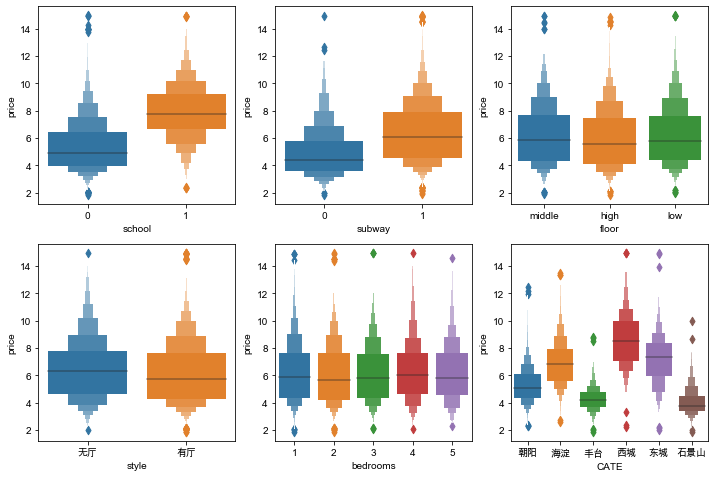

In [483]:
### 更为高级的箱图变形
plt.figure(4, figsize=(12, 8)) #设置画布
### 是否为学区房与房价的箱图
plt.subplot(231)  # 1*3分布的画图中的第一个子图
sns.boxenplot(x='school',y='price',data=data)

### 是否靠近地铁与房价的箱图
plt.subplot(232)  # 1*3分布的画图中的第一个子图
sns.boxenplot(x='subway',y='price',data=data)

### 楼层与房价的箱图
plt.subplot(233)  # 1*3分布的画图中的第一个子图
sns.boxenplot(x='floor',y='price',data=data)

### 是否有厅与房价的箱图
plt.subplot(234)  # 1*3分布的画图中的第一个子图
sns.boxenplot(x='style',y='price',data=data)

### 卧室数与房价的箱图
plt.subplot(235)  # 1*3分布的画图中的第一个子图
sns.boxenplot(x='bedrooms',y='price',data=data)

###城区与房价的箱图
plt.subplot(236) 
sns.boxenplot(x='CATE',y='price',data=data)

plt.show()

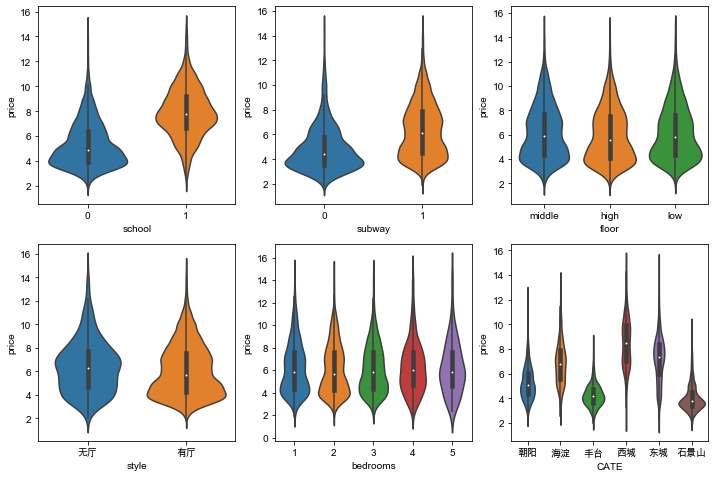

In [484]:
## 还有violinplot小提琴图
plt.figure(4, figsize=(12, 8)) #设置画布
### 是否为学区房与房价的箱图
plt.subplot(231)  # 1*3分布的画图中的第一个子图
sns.violinplot(x='school',y='price',data=data)

### 是否靠近地铁与房价的箱图
plt.subplot(232)  # 1*3分布的画图中的第一个子图
sns.violinplot(x='subway',y='price',data=data)

### 楼层与房价的箱图
plt.subplot(233)  # 1*3分布的画图中的第一个子图
sns.violinplot(x='floor',y='price',data=data)

### 是否有厅与房价的箱图
plt.subplot(234)  # 1*3分布的画图中的第一个子图
sns.violinplot(x='style',y='price',data=data)

### 卧室数与房价的箱图
plt.subplot(235)  # 1*3分布的画图中的第一个子图
sns.violinplot(x='bedrooms',y='price',data=data)

###城区与房价的箱图
plt.subplot(236) 
sns.violinplot(x='CATE',y='price',data=data)

plt.show()

### 处理分类数据

**注意区分独热编码和哑编码

In [485]:
data1=pd.get_dummies(data[["CATE","floor","style"]]) #one-hot编码
data1.head()

,CATE_东城,CATE_丰台,CATE_朝阳,CATE_海淀,CATE_石景山,CATE_西城,floor_high,floor_low,floor_middle,style_无厅,style_有厅
0,0,0,1,0,0,0,0,0,1,1,0
1,0,0,1,0,0,0,0,0,1,0,1
2,0,0,0,1,0,0,1,0,0,0,1
3,0,0,0,1,0,0,1,0,0,0,1
4,0,1,0,0,0,0,0,1,0,0,1


In [486]:
data2=pd.get_dummies(data[["CATE","floor","style"]],drop_first=True)#虚编码
data2.head()

,CATE_丰台,CATE_朝阳,CATE_海淀,CATE_石景山,CATE_西城,floor_low,floor_middle,style_有厅
0,0,1,0,0,0,0,1,0
1,0,1,0,0,0,0,1,1
2,0,0,1,0,0,0,0,1
3,0,0,1,0,0,0,0,1
4,1,0,0,0,0,1,0,1


In [487]:
data3=data[["AREA","subway","school","price"]]
data3.head()

,AREA,subway,school,price
0,46.06,1,0,4.8850
1,59.09,1,0,4.6540
2,278.95,1,1,7.1662
3,207.00,1,1,5.7972
4,53.32,1,1,7.1268


In [488]:
data1_new=pd.concat([data1,data3],axis=1) #one-hot编码后的完整数据
data1_new.head()

,CATE_东城,CATE_丰台,CATE_朝阳,CATE_海淀,CATE_石景山,CATE_西城,floor_high,floor_low,floor_middle,style_无厅,style_有厅,AREA,subway,school,price
0,0,0,1,0,0,0,0,0,1,1,0,46.06,1,0,4.8850
1,0,0,1,0,0,0,0,0,1,0,1,59.09,1,0,4.6540
2,0,0,0,1,0,0,1,0,0,0,1,278.95,1,1,7.1662
3,0,0,0,1,0,0,1,0,0,0,1,207.00,1,1,5.7972
4,0,1,0,0,0,0,0,1,0,0,1,53.32,1,1,7.1268


In [489]:
data1_new.shape

(16210, 15)

In [490]:
data2_new=pd.concat([data2,data3],axis=1) #哑编码后的完整数据
data2_new.head()

,CATE_丰台,CATE_朝阳,CATE_海淀,CATE_石景山,CATE_西城,floor_low,floor_middle,style_有厅,AREA,subway,school,price
0,0,1,0,0,0,0,1,0,46.06,1,0,4.8850
1,0,1,0,0,0,0,1,1,59.09,1,0,4.6540
2,0,0,1,0,0,0,0,1,278.95,1,1,7.1662
3,0,0,1,0,0,0,0,1,207.00,1,1,5.7972
4,1,0,0,0,0,1,0,1,53.32,1,1,7.1268


In [491]:
data2_new.shape

(16210, 12)

### 拆分数据集

#### 先拆分成特征和标签

In [492]:
X=data2_new.iloc[:,:11] #特征
X.head()

,CATE_丰台,CATE_朝阳,CATE_海淀,CATE_石景山,CATE_西城,floor_low,floor_middle,style_有厅,AREA,subway,school
0,0,1,0,0,0,0,1,0,46.06,1,0
1,0,1,0,0,0,0,1,1,59.09,1,0
2,0,0,1,0,0,0,0,1,278.95,1,1
3,0,0,1,0,0,0,0,1,207.00,1,1
4,1,0,0,0,0,1,0,1,53.32,1,1


In [493]:
y=data2_new.iloc[:,11].values #标签
y

array([4.885 , 4.654 , 7.1662, ..., 5.017 , 5.2693, 4.6719])

#### 再拆分成训练集和测试集

In [494]:
from sklearn import model_selection
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.1,random_state=42)

In [495]:
X_train.shape

(14589, 11)

In [496]:
y_train.shape

(14589,)

### 数据标准化

In [497]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)#拟合,对X_train进行缩放
X_test=sc_X.transform(X_test)#sc_X已经被拟合好了，所以对X_test进行缩放时，直接转换X_test

In [498]:
X_train[1:3,]

array([[-0.47394995, -0.4626339 ,  2.12845625, -0.3688333 , -0.45112556,
        -0.67569926, -0.72595068,  0.22884409, -0.60708616,  0.45606872,
         1.51311441],
       [-0.47394995, -0.4626339 ,  2.12845625, -0.3688333 , -0.45112556,
         1.47994834, -0.72595068,  0.22884409,  0.22285113,  0.45606872,
         1.51311441]])

In [499]:
sc_y=StandardScaler()
y_train=sc_y.fit_transform(y_train.reshape(-1,1))
y_test=sc_y.transform(y_test.reshape(-1,1))

### 构建多元线性回归模型

#### 普通线性回归模型

In [500]:
from sklearn import linear_model
reg = linear_model.LinearRegression().fit(X_train, y_train)

reg.score(X_train,y_train) #训练集上的R方

0.5879637697298012

In [501]:
reg.intercept_ #截距项

array([-9.35408243e-17])

In [502]:
reg.coef_ #特征权重

array([[-0.39976372, -0.26808439, -0.03995536, -0.35067999,  0.21785642,
         0.03931168,  0.029737  ,  0.0190997 , -0.02076724,  0.11457616,
         0.24294299]])

In [503]:
reg.score(X_test,y_test) #测试集上的R方

0.6037887512632714

In [504]:
pre_y=reg.predict(X_test)
pre_y

array([[ 0.82099935],
       [-1.09362533],
       [-0.7788054 ],
       ...,
       [ 0.69659156],
       [-0.15554442],
       [ 0.1571171 ]])

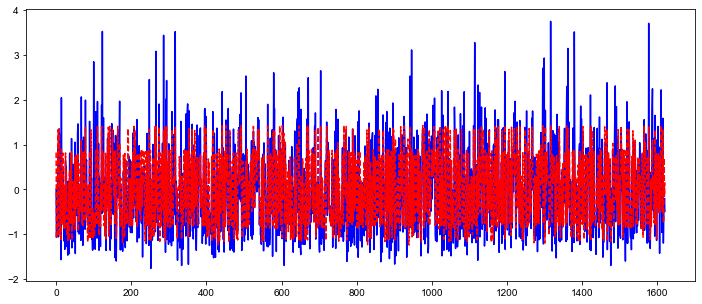

In [505]:
fig=plt.figure(figsize=(12,5))
plt.plot(range(len(y_test)),y_test,"b",label="真实值")
plt.plot(range(len(pre_y)),pre_y,"r--",label="预测值")
plt.show()

**以上为虚编码后普通线性回归模型的结果，下面来看看独热编码后普通线性回归的结果是否有不同？**

In [506]:
X1=data1_new.iloc[:,:14] #特征
y1=data1_new.iloc[:,14].values #标签
X1_train,X1_test,y1_train,y1_test=model_selection.train_test_split(X1,y1,test_size=0.1,random_state=42)
sc_X=StandardScaler()
X1_train=sc_X.fit_transform(X1_train)#拟合,对X_train进行缩放
X1_test=sc_X.transform(X1_test)#sc_X已经被拟合好了，所以对X_test进行缩放时，直接转换X_test
sc_y=StandardScaler()
y1_train=sc_y.fit_transform(y1_train.reshape(-1,1))
y1_test=sc_y.transform(y1_test.reshape(-1,1))
from sklearn import linear_model
reg1 = linear_model.LinearRegression().fit(X1_train, y1_train)
reg1.score(X1_train,y1_train)

0.5879401587211723

In [507]:
reg1.intercept_ #截距项

array([-0.00125209])

In [508]:
reg1.coef_ #特征权重

array([[-7.36666690e+11, -7.57913293e+11, -7.46275891e+11,
        -7.53711979e+11, -6.35811947e+11, -7.34070233e+11,
         2.65248123e+12,  2.59492798e+12,  2.65931576e+12,
         4.43217741e+12,  4.43217741e+12, -2.05535889e-02,
         1.13830566e-01,  2.43469238e-01]])

In [509]:
pre1_y=reg1.predict(X1_test)
pre1_y

array([[ 0.82530929],
       [-1.09338957],
       [-0.77625919],
       ...,
       [ 0.69884444],
       [-0.15268128],
       [ 0.15792019]])

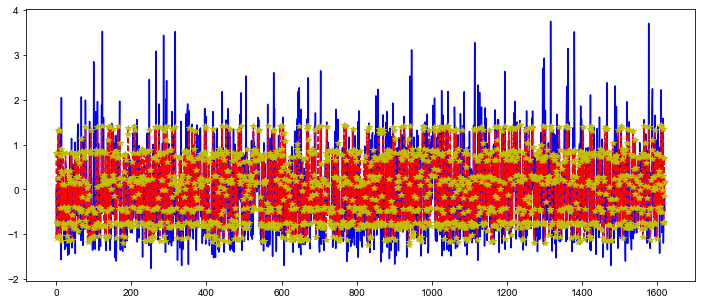

In [510]:
fig=plt.figure(figsize=(12,5))
plt.plot(range(len(y_test)),y_test,"b",label="真实值")
plt.plot(range(len(pre_y)),pre_y,"r--",label="哑编码后预测值")
plt.plot(range(len(pre1_y)),pre_y,"y*",label="独热编码后预测值")
plt.show()

#### 岭回归(ridge)

In [511]:
rid=linear_model.Ridge().fit(X_train, y_train)

rid.score(X_train, y_train) ##训练集上的R方

0.5879637654479111

In [512]:
rid.intercept_ #截距项

array([-9.35416729e-17])

In [513]:
rid.coef_ #特征权重

array([[-0.39968982, -0.26801993, -0.03990486, -0.35061498,  0.21788962,
         0.03930674,  0.02973391,  0.01909206, -0.02076729,  0.1145807 ,
         0.24295051]])

In [514]:
rid.score(X_test,y_test)

0.6037891520515992

In [515]:
pre_y_rid=rid.predict(X_test)
pre_y_rid

array([[ 0.82088266],
       [-1.0935744 ],
       [-0.7787476 ],
       ...,
       [ 0.69660184],
       [-0.15555839],
       [ 0.157111  ]])

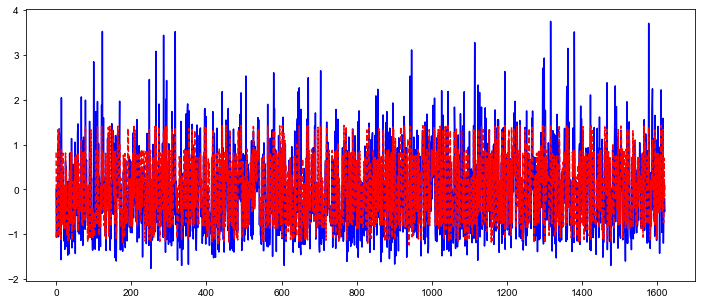

In [516]:
fig=plt.figure(figsize=(12,5))
plt.plot(range(len(y_test)),y_test,"b",label="真实值")
plt.plot(range(len(pre_y_rid)),pre_y_rid,"r--",label="预测值")
plt.show()

#### Lasso回归

In [517]:
las=linear_model.Lasso().fit(X_train, y_train)
las.score(X_train, y_train)

0.0

In [518]:
las.intercept_

array([-1.53904657e-16])

In [519]:
las.coef_ #特征权重

array([-0., -0.,  0., -0.,  0.,  0.,  0., -0., -0.,  0.,  0.])

In [520]:
las.score(X_test,y_test)

-0.0021101933459557465

In [521]:
pre_y_las=las.predict(X_test)
pre_y_las

array([-1.53904657e-16, -1.53904657e-16, -1.53904657e-16, ...,
       -1.53904657e-16, -1.53904657e-16, -1.53904657e-16])

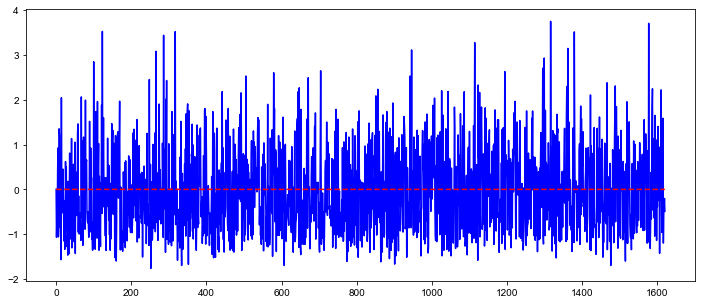

In [522]:
fig=plt.figure(figsize=(12,5))
plt.plot(range(len(y_test)),y_test,"b",label="真实值")
plt.plot(range(len(pre_y_las)),pre_y_las,"r--",label="预测值")
plt.show()

#### 弹性网络回归(ElasticNet)

In [523]:
ela=linear_model.ElasticNet().fit(X_train, y_train)
ela.score(X_train, y_train)

0.02135432745814847

In [524]:
ela.intercept_

array([-1.51506926e-16])

In [525]:
ela.coef_ #特征权重

array([-0.        , -0.        ,  0.        , -0.        ,  0.        ,
        0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.02051278])

In [526]:
ela.score(X_test,y_test)

0.020251205573368125

In [527]:
pre_y_ela=ela.predict(X_test)
pre_y_ela

array([ 0.03103818, -0.01355666, -0.01355666, ...,  0.03103818,
       -0.01355666, -0.01355666])

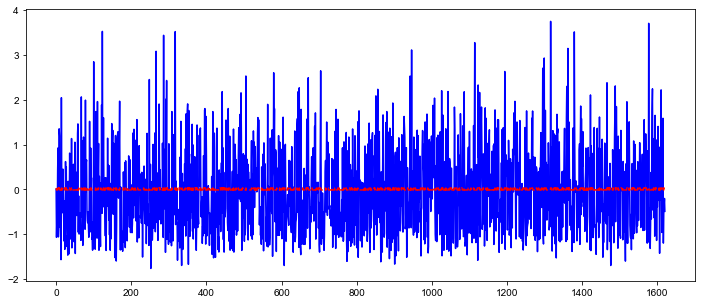

In [528]:
fig=plt.figure(figsize=(12,5))
plt.plot(range(len(y_test)),y_test,"b",label="真实值")
plt.plot(range(len(pre_y_ela)),pre_y_ela,"r--",label="预测值")
plt.show()

#### 随机梯度下降法求解线性回归

In [529]:
sgd=linear_model.SGDRegressor(max_iter=100000, tol=0.00000001).fit(X_train,y_train)

sgd.score(X_train,y_train)

0.5872175811959814

In [530]:
sgd.intercept_

array([-0.00498624])

In [531]:
sgd.coef_

array([-0.4021855 , -0.27040117, -0.03807204, -0.34471545,  0.22429596,
        0.0444278 ,  0.03164308,  0.02409668, -0.02850273,  0.10951935,
        0.26401191])

In [532]:
sgd.score(X_test,y_test)

0.6044080879392413

In [533]:
pre_y_sgd=sgd.predict(X_test)
pre_y_sgd

array([ 0.84922318, -1.08175278, -0.81706029, ...,  0.72079145,
       -0.17014227,  0.13129819])

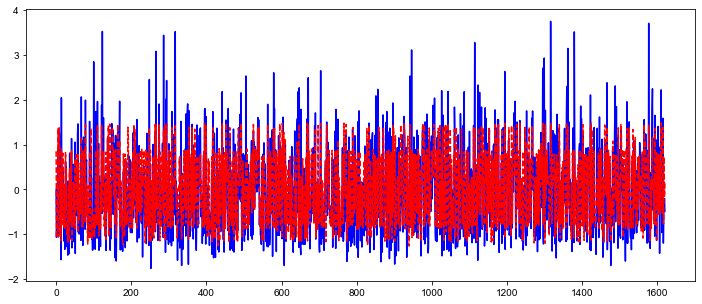

In [534]:
fig=plt.figure(figsize=(12,5))
plt.plot(range(len(y_test)),y_test,"b",label="真实值")
plt.plot(range(len(pre_y_sgd)),pre_y_sgd,"r--",label="预测值")
plt.show()

## 利用线性回归完成人脸图像

### 单张图片导入及数据预处理

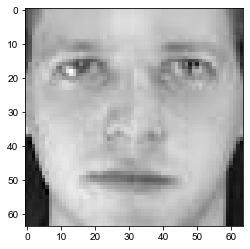

In [535]:
import matplotlib.pyplot as plt
img = plt.imread('/Users/yangwei/Desktop/图片/图片'+str(0)+'.jpg')
plt.imshow(img,cmap='gray')
plt.show()

In [536]:
img.shape

(64, 64)

In [537]:
img_new=img.reshape(1,4096)

In [538]:
img_new.shape

(1, 4096)

In [539]:
n_pixels=img_new.shape[1]
n_pixels

4096

In [540]:
# 上半张脸
img_new_upper = img_new[:, :(n_pixels + 1) // 2]
# 下半张脸
img_new_lower= img_new[:, n_pixels // 2:]

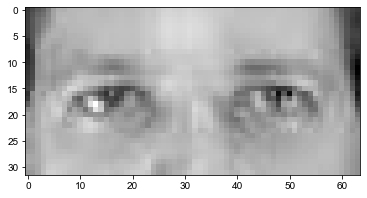

In [541]:
plt.imshow(img_new_upper.reshape(32,64),cmap='gray')
plt.show()

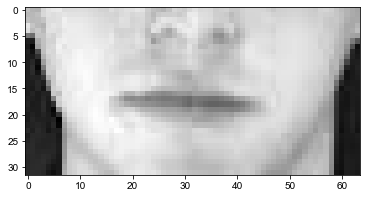

In [542]:
plt.imshow(img_new_lower.reshape(32,64),cmap='gray')
plt.show()

### 将395张图片导入并做数据预处理

#### 将395张图片输入，并将每张图片拉伸成一位行向量，所有图片构造成一个大矩阵

In [543]:
img_all=np.empty((0,4096))
n_pixels=img_new.shape[1]
for i in range(395):
    img = plt.imread('/Users/yangwei/Desktop/图片/图片'+str(i)+'.jpg')
    img_new=img.reshape(1,4096)
    img_all=np.vstack((img_all,img_new))   

In [544]:
img_all.shape

(395, 4096)

#### 将所有图片的上半张脸作为特征X，下半张脸作为特征Y

In [545]:
# 上半张脸
X=img_new_upper = img_all[:, :(n_pixels + 1) // 2]
# 下半张脸
Y=img_new_lower= img_all[:, n_pixels // 2:]

### 用线性回归模型进行训练

In [546]:
from sklearn import linear_model
face_reg = linear_model.Ridge().fit(X,Y) #训练模型
face_reg.intercept_ #截距项

array([  9.16372419,   3.48122571,   7.93897854, ...,  77.64398492,
       119.03878743, 115.73292421])

In [547]:
face_reg.intercept_.shape

(2048,)

In [548]:
face_reg.coef_ #特征权重

array([[-0.025892  ,  0.01967331,  0.0193319 , ..., -0.0045816 ,
        -0.01561857, -0.0031373 ],
       [ 0.01557286, -0.04890349,  0.01468652, ...,  0.02163044,
         0.00504796,  0.00389154],
       [-0.04079864, -0.01056134,  0.00730655, ...,  0.00153392,
        -0.02708529,  0.01171588],
       ...,
       [ 0.01930024, -0.05126717, -0.03068666, ...,  0.0315233 ,
         0.05086572, -0.0567861 ],
       [ 0.01978982, -0.06988695, -0.0459318 , ...,  0.0491132 ,
         0.05183319, -0.07392141],
       [-0.09726446, -0.09786212,  0.00038519, ...,  0.01910282,
         0.01980488, -0.04801212]])

In [549]:
face_reg.coef_ .shape

(2048, 2048)

### 用一张测试照片验证模型的效果

In [550]:
test1 = plt.imread('/Users/yangwei/Desktop/图片/test'+str(1)+'.jpg')

In [551]:
test1.shape

(64, 64)

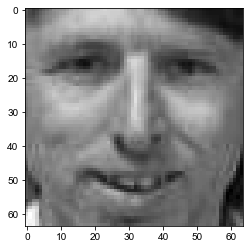

In [552]:
plt.imshow(test1,cmap='gray')
plt.show()

In [553]:
img_test1=test1.reshape(1,4096)
# 上半张脸
X_test1=img_test1[:, :(n_pixels + 1) // 2]
# 下半张脸
Y_test1=img_test1[:, n_pixels // 2:]

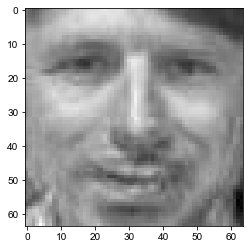

In [554]:
Y_pre1=face_reg.predict(X_test1)
test1_new=np.hstack((X_test1,Y_pre1)).reshape(64,64)
plt.imshow(test1_new,cmap='gray')
plt.show()

In [555]:
Y_pre1=face_reg.predict(X_test1)

In [556]:
Y_pre1

array([[113.73216112, 119.8357448 , 116.19945538, ...,  64.14854804,
         49.10741278,  22.96444116]])

### 用多张测试照片验证模型的效果

In [557]:
test_all=np.empty((0,4096))
for i in range(1,6):
    test = plt.imread('/Users/yangwei/Desktop/图片/test'+str(i)+'.jpg')
    img_test=test.reshape(1,4096)
    test_all=np.vstack((test_all,img_test))  

In [558]:
test_all.shape

(5, 4096)

In [559]:
# 上半张脸
X_test=test_all[:, :(n_pixels + 1) // 2]
# 下半张脸
Y_test=test_all[:, n_pixels // 2:]

In [560]:
X_test

array([[ 84.,  69.,  60., ...,  94.,  91.,  87.],
       [163., 169., 174., ..., 132., 122., 114.],
       [159., 172., 184., ..., 122., 110.,  99.],
       [114., 127., 181., ..., 147., 144., 122.],
       [ 95.,  97., 106., ...,  85.,  46.,  43.]])

In [561]:
Y_pre=face_reg.predict(X_test)

In [562]:
Y_pre

array([[113.73216112, 119.8357448 , 116.19945538, ...,  64.14854804,
         49.10741278,  22.96444116],
       [170.59972423, 175.41805228, 180.313299  , ...,  85.49303776,
         73.22502928,  96.90383929],
       [156.22570704, 150.41218565, 136.3983616 , ...,  57.41551197,
         70.32186888,  52.68737533],
       [168.8109924 , 160.40637565, 185.59801613, ...,   7.20844665,
         12.32471771,  13.06693699],
       [146.7434045 , 165.8972241 , 159.50543314, ..., 121.84898971,
        173.10114417, 167.16771211]])

In [563]:
pre_face.shape

(4096,)

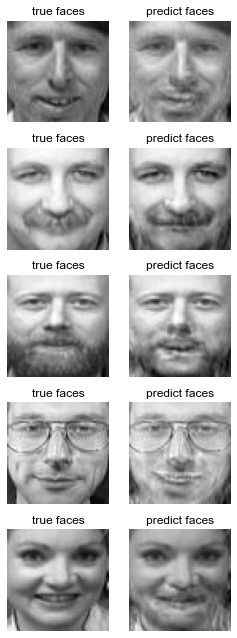

In [564]:
plt.figure(4, figsize=(2. *2, 2.26 *5))

for i in range(1,6):
    true_face = np.hstack((X_test[i-1], Y_test[i-1]))
    sub1 = plt.subplot(5,2,2*i-1,title="true faces")
    sub1.axis("off")
    sub1.imshow(true_face.reshape((64,64)),cmap=plt.cm.gray)
  
    pre_face = np.hstack((X_test[i-1], Y_pre[i-1]))
    sub2 = plt.subplot(5,2,2*i,title="predict faces")
    sub2.axis("off")
    sub2.imshow(pre_face.reshape((64,64)),cmap=plt.cm.gray)